<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:


# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# TruncatedSVD is added by aidentify
# t-SNE        is added by aidentify

import matplotlib.pyplot as plt

from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# 차원선택: feature selection

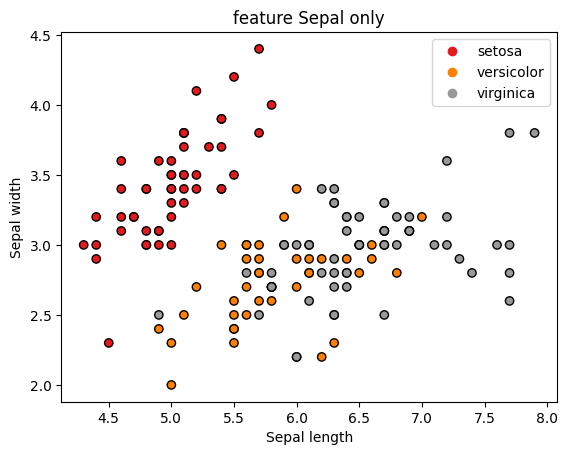

In [8]:

# just emdbedding by sepal features

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

fig, ax = plt.subplots()


# Plot the training points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
ax.set_title("feature Sepal only")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")

classes = [iris.target_names[0],iris.target_names[1],iris.target_names[2]]
legend = ax.legend(*scatter.legend_elements())
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

# PCA 차원축소

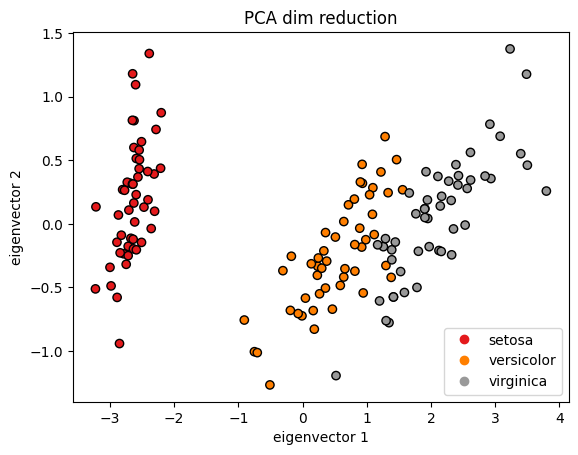

In [11]:

# To getter a better understanding of interaction of the dimensions
# plot the first two PCA dimensions

from sklearn.decomposition import PCA

X_reduced1 = PCA(n_components=2).fit_transform(iris.data)


x_min, x_max = X_reduced1[:, 0].min() - 0.5, X_reduced1[:, 0].max() + 0.5
y_min, y_max = X_reduced1[:, 1].min() - 0.5, X_reduced1[:, 1].max() + 0.5

fig, ax = plt.subplots()


# Plot the training points
scatter = ax.scatter(X_reduced1[:, 0], X_reduced1[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.title("PCA dim reduction")
plt.xlabel("eigenvector 1")
plt.ylabel("eigenvector 2")

classes = [iris.target_names[0],iris.target_names[1],iris.target_names[2]]
legend = ax.legend(*scatter.legend_elements())
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

#SVD 차원축소

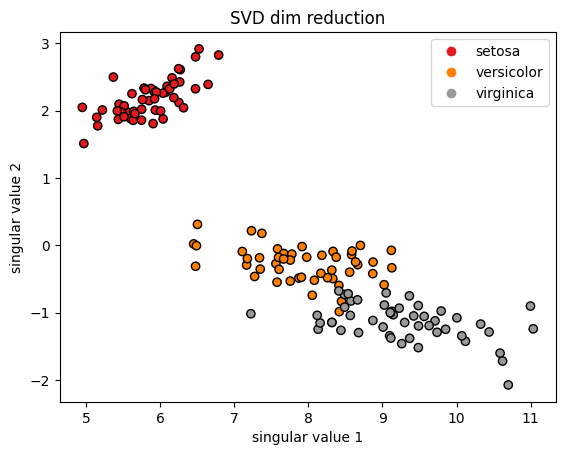

In [9]:
from sklearn.decomposition import TruncatedSVD


# To getter a better understanding of interaction of the dimensions
# plot the first two SVD sigular values

X_reduced2 = TruncatedSVD(n_components=2).fit_transform(iris.data)


x_min, x_max = X_reduced2[:, 0].min() - 0.5, X_reduced2[:, 0].max() + 0.5
y_min, y_max = X_reduced2[:, 1].min() - 0.5, X_reduced2[:, 1].max() + 0.5


fig, ax = plt.subplots()

# Plot the training points
scatter = ax.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.title("SVD dim reduction")
plt.xlabel("singular value 1")
plt.ylabel("singular value 2")

classes = [iris.target_names[0],iris.target_names[1],iris.target_names[2]]
legend = ax.legend(*scatter.legend_elements())
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()


#t-SNE 차원축소

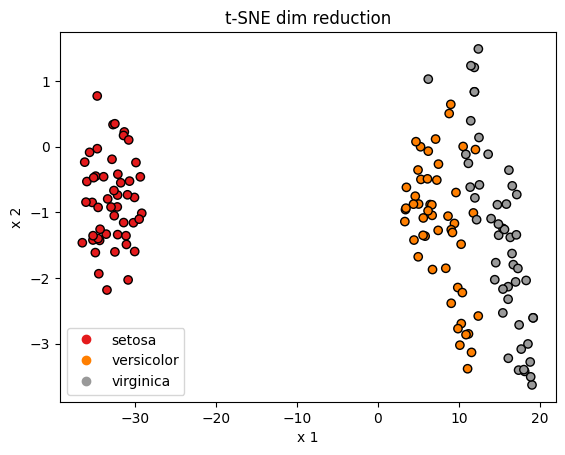

In [10]:

# dimensionalty reduction by t-SNE
from sklearn.manifold import TSNE

X_reduced3 = TSNE(n_components=2, n_iter=50000).fit_transform(iris.data)


x_min, x_max = X_reduced3[:, 0].min() - 0.5, X_reduced3[:, 0].max() + 0.5
y_min, y_max = X_reduced3[:, 1].min() - 0.5, X_reduced3[:, 1].max() + 0.5


fig, ax = plt.subplots()

# Plot the training points
scatter = ax.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.title("t-SNE dim reduction")
plt.xlabel("x 1")
plt.ylabel("x 2")

classes = [iris.target_names[0],iris.target_names[1],iris.target_names[2]]
legend = ax.legend(*scatter.legend_elements())
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()
